## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.696486  1.308165  1.046300  0.629758 -0.514554  0.605030
1  1.587255  0.384409 -0.079229 -0.727071  0.077580  0.106998
2 -1.451819 -0.490863  1.412217  1.422108  0.402545  0.324021
3  0.105213  0.423048 -0.095433  0.559124  0.750205  0.886928
4 -1.593266  0.884089 -0.548820 -1.699660  1.499730 -1.520084


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9779366	total: 69.1ms	remaining: 1m 9s
1:	learn: 0.9682934	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9575478	total: 70.1ms	remaining: 23.3s
3:	learn: 0.9483632	total: 70.8ms	remaining: 17.6s
4:	learn: 0.9399103	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9297676	total: 72ms	remaining: 11.9s
6:	learn: 0.9202036	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9096572	total: 73ms	remaining: 9.05s
8:	learn: 0.9025963	total: 73.4ms	remaining: 8.09s
9:	learn: 0.8942217	total: 74.1ms	remaining: 7.33s
10:	learn: 0.8850107	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8761364	total: 75.2ms	remaining: 6.2s
12:	learn: 0.8672251	total: 75.7ms	remaining: 5.75s
13:	learn: 0.8604284	total: 76.3ms	remaining: 5.37s
14:	learn: 0.8546076	total: 76.8ms	remaining: 5.05s
15:	learn: 0.8462040	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8371701	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8285647	total: 78.4ms	remaining: 4.28s
18:	learn: 0.8205544	total: 78.9ms	remaining: 4.07

83:	learn: 0.4733549	total: 110ms	remaining: 1.2s
84:	learn: 0.4699972	total: 110ms	remaining: 1.19s
85:	learn: 0.4670243	total: 111ms	remaining: 1.18s
86:	learn: 0.4635289	total: 112ms	remaining: 1.17s
87:	learn: 0.4599815	total: 112ms	remaining: 1.16s
88:	learn: 0.4561756	total: 113ms	remaining: 1.15s
89:	learn: 0.4533785	total: 113ms	remaining: 1.14s
90:	learn: 0.4497536	total: 113ms	remaining: 1.13s
91:	learn: 0.4462388	total: 114ms	remaining: 1.13s
92:	learn: 0.4434394	total: 115ms	remaining: 1.12s
93:	learn: 0.4399667	total: 115ms	remaining: 1.11s
94:	learn: 0.4366172	total: 116ms	remaining: 1.1s
95:	learn: 0.4333769	total: 116ms	remaining: 1.09s
96:	learn: 0.4306005	total: 117ms	remaining: 1.08s
97:	learn: 0.4277781	total: 117ms	remaining: 1.08s
98:	learn: 0.4246099	total: 118ms	remaining: 1.07s
99:	learn: 0.4214943	total: 118ms	remaining: 1.06s
100:	learn: 0.4183383	total: 118ms	remaining: 1.05s
101:	learn: 0.4148431	total: 119ms	remaining: 1.05s
102:	learn: 0.4119404	total: 11

252:	learn: 0.1550352	total: 188ms	remaining: 555ms
253:	learn: 0.1543239	total: 189ms	remaining: 554ms
254:	learn: 0.1532153	total: 189ms	remaining: 552ms
255:	learn: 0.1522588	total: 189ms	remaining: 551ms
256:	learn: 0.1512516	total: 190ms	remaining: 549ms
257:	learn: 0.1504370	total: 190ms	remaining: 547ms
258:	learn: 0.1496619	total: 191ms	remaining: 546ms
259:	learn: 0.1486006	total: 191ms	remaining: 544ms
260:	learn: 0.1475886	total: 192ms	remaining: 543ms
261:	learn: 0.1465892	total: 192ms	remaining: 542ms
262:	learn: 0.1460665	total: 193ms	remaining: 541ms
263:	learn: 0.1452268	total: 194ms	remaining: 540ms
264:	learn: 0.1442275	total: 194ms	remaining: 538ms
265:	learn: 0.1431772	total: 195ms	remaining: 537ms
266:	learn: 0.1422996	total: 195ms	remaining: 536ms
267:	learn: 0.1413495	total: 196ms	remaining: 534ms
268:	learn: 0.1403841	total: 196ms	remaining: 533ms
269:	learn: 0.1394046	total: 197ms	remaining: 532ms
270:	learn: 0.1386149	total: 197ms	remaining: 531ms
271:	learn: 

467:	learn: 0.0527215	total: 293ms	remaining: 333ms
468:	learn: 0.0526399	total: 294ms	remaining: 333ms
469:	learn: 0.0524290	total: 294ms	remaining: 332ms
470:	learn: 0.0521558	total: 295ms	remaining: 331ms
471:	learn: 0.0520762	total: 295ms	remaining: 330ms
472:	learn: 0.0519976	total: 296ms	remaining: 329ms
473:	learn: 0.0517297	total: 296ms	remaining: 328ms
474:	learn: 0.0516159	total: 297ms	remaining: 328ms
475:	learn: 0.0513527	total: 297ms	remaining: 327ms
476:	learn: 0.0512404	total: 298ms	remaining: 326ms
477:	learn: 0.0510915	total: 298ms	remaining: 325ms
478:	learn: 0.0507175	total: 298ms	remaining: 324ms
479:	learn: 0.0503649	total: 299ms	remaining: 324ms
480:	learn: 0.0502109	total: 299ms	remaining: 323ms
481:	learn: 0.0499585	total: 300ms	remaining: 322ms
482:	learn: 0.0497738	total: 300ms	remaining: 322ms
483:	learn: 0.0496655	total: 301ms	remaining: 321ms
484:	learn: 0.0494181	total: 301ms	remaining: 320ms
485:	learn: 0.0493458	total: 302ms	remaining: 319ms
486:	learn: 

627:	learn: 0.0289964	total: 371ms	remaining: 220ms
628:	learn: 0.0288496	total: 372ms	remaining: 219ms
629:	learn: 0.0288063	total: 372ms	remaining: 219ms
630:	learn: 0.0287668	total: 373ms	remaining: 218ms
631:	learn: 0.0286555	total: 373ms	remaining: 217ms
632:	learn: 0.0285117	total: 374ms	remaining: 217ms
633:	learn: 0.0284725	total: 374ms	remaining: 216ms
634:	learn: 0.0284306	total: 374ms	remaining: 215ms
635:	learn: 0.0282892	total: 375ms	remaining: 215ms
636:	learn: 0.0282458	total: 375ms	remaining: 214ms
637:	learn: 0.0282079	total: 376ms	remaining: 213ms
638:	learn: 0.0280502	total: 376ms	remaining: 212ms
639:	learn: 0.0280081	total: 377ms	remaining: 212ms
640:	learn: 0.0278696	total: 377ms	remaining: 211ms
641:	learn: 0.0278278	total: 377ms	remaining: 210ms
642:	learn: 0.0277658	total: 378ms	remaining: 210ms
643:	learn: 0.0275797	total: 378ms	remaining: 209ms
644:	learn: 0.0275435	total: 379ms	remaining: 208ms
645:	learn: 0.0274069	total: 379ms	remaining: 208ms
646:	learn: 

851:	learn: 0.0149168	total: 477ms	remaining: 82.9ms
852:	learn: 0.0148641	total: 478ms	remaining: 82.3ms
853:	learn: 0.0148127	total: 478ms	remaining: 81.7ms
854:	learn: 0.0147450	total: 479ms	remaining: 81.2ms
855:	learn: 0.0147313	total: 479ms	remaining: 80.6ms
856:	learn: 0.0146654	total: 480ms	remaining: 80ms
857:	learn: 0.0146325	total: 480ms	remaining: 79.5ms
858:	learn: 0.0145715	total: 481ms	remaining: 78.9ms
859:	learn: 0.0145394	total: 481ms	remaining: 78.3ms
860:	learn: 0.0144795	total: 481ms	remaining: 77.7ms
861:	learn: 0.0144206	total: 482ms	remaining: 77.1ms
862:	learn: 0.0143894	total: 482ms	remaining: 76.6ms
863:	learn: 0.0143315	total: 483ms	remaining: 76ms
864:	learn: 0.0142852	total: 483ms	remaining: 75.4ms
865:	learn: 0.0142475	total: 484ms	remaining: 74.8ms
866:	learn: 0.0142020	total: 484ms	remaining: 74.3ms
867:	learn: 0.0141651	total: 485ms	remaining: 73.7ms
868:	learn: 0.0141204	total: 485ms	remaining: 73.1ms
869:	learn: 0.0140548	total: 486ms	remaining: 72.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

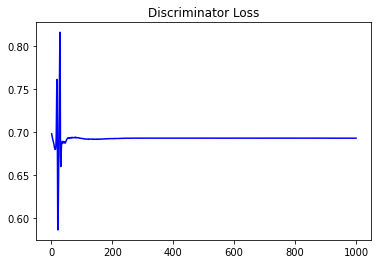

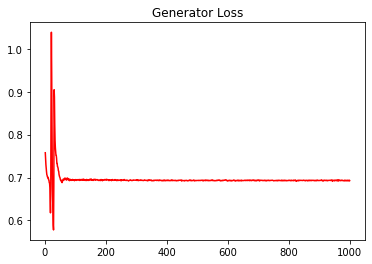

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15310893037487505


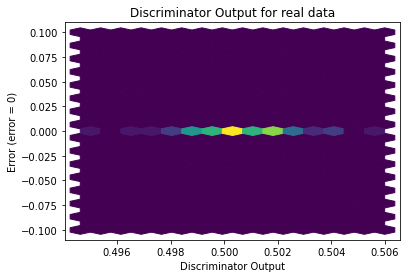

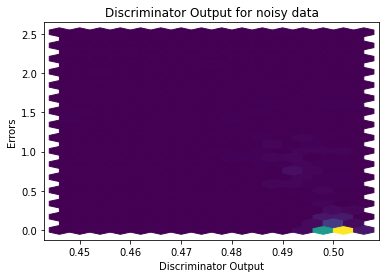

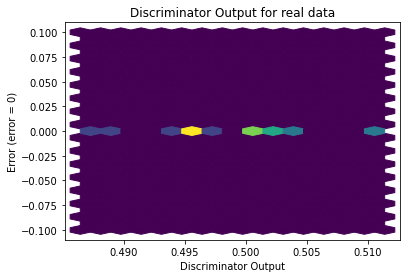

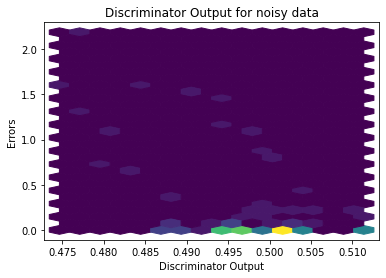

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


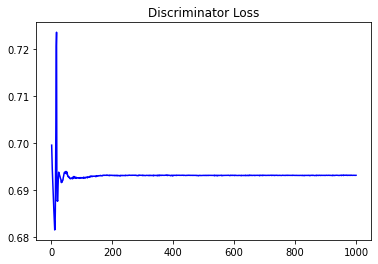

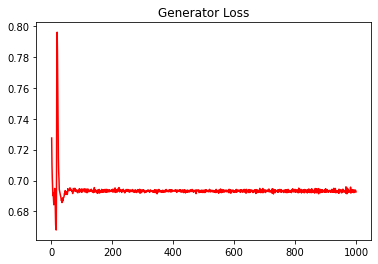

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14950166452711502


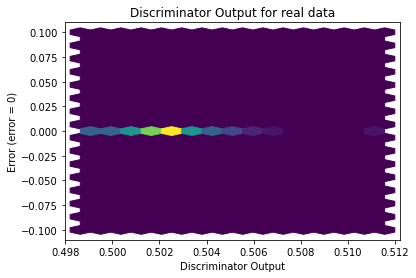

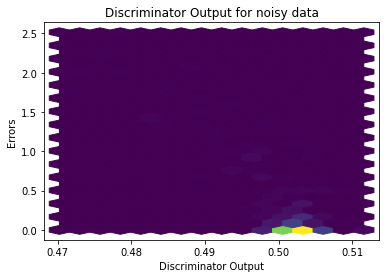

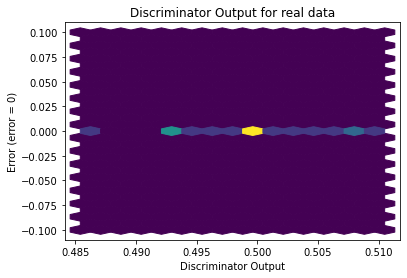

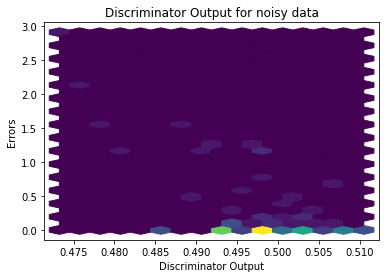

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7928]], requires_grad=True)
